# estimate pi value using Monte Carlo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
print(f'NumPy version = {np.__version__}')

NumPy version = 1.14.5


In [3]:
def circle(a, b, r):
    # ref: https://en.wikipedia.org/wiki/Circle#Equations
    fig, ax = plt.subplots(figsize=(5,5))
#     ax.set_aspect(1)
    t = np.linspace(0, np.pi * 2, 90)
    x = a + r * np.cos(t)
    y = b + r * np.sin(t)

    ax.axvline(a, color='gray', linewidth=.5, linestyle='--')
    ax.axhline(b, color='gray', linewidth=.5, linestyle='--')
    ax.plot(a, b, color='r', marker='o') # center point
    
    rect=mpl.patches.Rectangle((-.5, -.5), 1, 1, fill=False)
    ax.add_patch(rect)
    ax.axis('off')
    
    ax.plot(x, y)

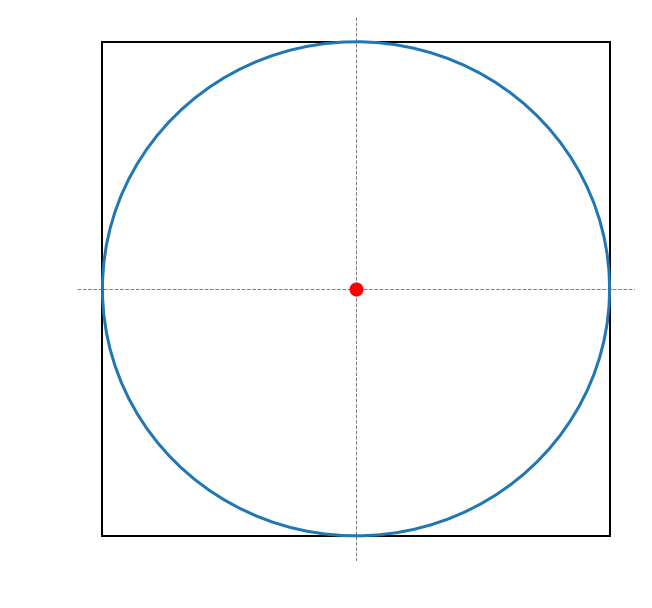

In [4]:
circle(0, 0, .5)

$$
circle \ area=\pi \cdot r^2
\\
r = .5
\\
circle \ area=\pi \cdot 0.5^2
\\
circle \ area=\pi \cdot 0.25
\\
circle \ area=\frac{\pi}{4}
$$

In [5]:
n = 100000
# radius = .5
x=np.random.uniform(-.5, .5, n)
y=np.random.uniform(-.5, .5, n)

In [6]:
x

array([ 0.34909626, -0.12693527,  0.00654788, ...,  0.11625171,
       -0.09018529, -0.39964323])

In [7]:
y

array([ 0.41463953,  0.06672795,  0.27907892, ...,  0.14599613,
       -0.19159122, -0.39221779])

$$
x^2+y^2=r^2
$$

In [8]:
a=x**2 + y**2

In [9]:
a < .25

array([False,  True,  True, ...,  True,  True, False])

In [10]:
(a < .25).sum()

78718

In [11]:
a[a < .25].size

78718

In [12]:
pi_est=(a < .25).sum() / n * 4
pi_est

3.14872

In [13]:
np.pi

3.141592653589793

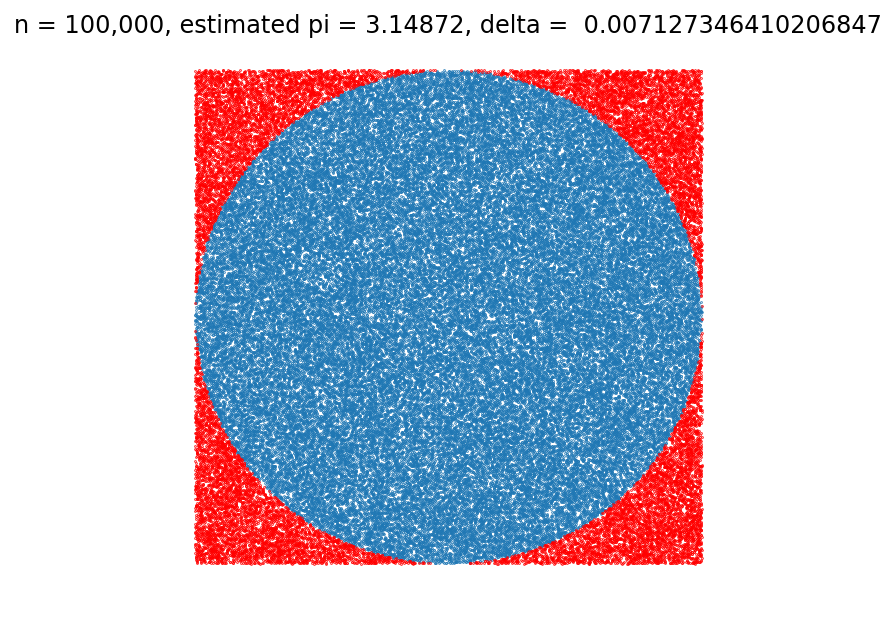

In [14]:
plt.figure(figsize=(5,5))
plt.scatter(x[a < .25], y[a < .25], s=.1)
plt.scatter(x[a >= .25], y[a > .25], color='r', s=.1)
plt.title(f'n = {n:,}, estimated pi = {pi_est}, delta =  {np.abs(np.pi - pi_est)}')
plt.axis('off');